In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\popov\Group1FinalProject\Milos\Machine Learning Models\FINAL_opioid_data_NOSUPPRESSED.csv")
df.head()

,Unnamed: 0,Year,countycode,State,county,population,deaths,cruderate,DispenseRate,PersonalIncome,PerCapitaPersonalIncome,LessThanHS,HSDiplomaOnly,SomeCollege,BachelorOrHigher,PovertyPop,PovertyRate,UnemployedPop,UnemployedRate
0,1,2020,1003,AL,"Baldwin County, AL",229287,41,17.9,65.0,51348.0,233140.0,20635.83,62824.64,71537.54,74518.28,20189.0,8.9,6159.0,6.2
1,27,2020,1055,AL,"Etowah County, AL",102371,13,12.7,102.8,39795.0,103393.0,14127.20,34601.40,35215.62,18426.78,15650.0,15.6,3505.0,8.5
2,36,2020,1073,AL,"Jefferson County, AL",655342,227,34.6,139.0,58053.0,673341.0,58980.78,173010.29,195947.26,227403.67,92310.0,14.4,21947.0,6.9
3,44,2020,1089,AL,"Madison County, AL",379453,68,17.9,87.3,56499.0,389696.0,30356.24,72854.98,108144.11,168097.68,39100.0,10.5,9761.0,5.1
4,48,2020,1097,AL,"Mobile County, AL",412716,46,11.1,98.0,42837.0,414250.0,49938.64,141148.87,122576.65,98639.12,71398.0,17.6,16931.0,8.7


In [2]:
#  Check for null values

print(df.isnull().sum())

Unnamed: 0                 0
Year                       0
countycode                 0
State                      0
county                     0
population                 0
deaths                     0
cruderate                  0
DispenseRate               0
PersonalIncome             0
PerCapitaPersonalIncome    0
LessThanHS                 0
HSDiplomaOnly              0
SomeCollege                0
BachelorOrHigher           0
PovertyPop                 0
PovertyRate                0
UnemployedPop              0
UnemployedRate             0
dtype: int64


In [3]:
# Check if there are any suppressed values in the 'deaths' and 'cruderate' columns

num_suppressed_deaths = len(df[df['deaths'] == 'Suppressed'])
num_suppressed_crude = len(df[df['cruderate'] == 'Suppressed'])

print(f"Number of rows with Suppressed values in 'deaths' column: {num_suppressed_deaths}")
print(f"Number of rows with Suppressed values in 'cruderate' column: {num_suppressed_crude}")

Number of rows with Suppressed values in 'deaths' column: 0
Number of rows with Suppressed values in 'cruderate' column: 0


In [4]:
# Drop the columns that are not needed

df.drop(['Unnamed: 0', 'PovertyRate', 'UnemployedRate', 'cruderate'], axis=1, inplace=True)

In [5]:
# Data frame 

df.head()

,Year,countycode,State,county,population,deaths,DispenseRate,PersonalIncome,PerCapitaPersonalIncome,LessThanHS,HSDiplomaOnly,SomeCollege,BachelorOrHigher,PovertyPop,UnemployedPop
0,2020,1003,AL,"Baldwin County, AL",229287,41,65.0,51348.0,233140.0,20635.83,62824.64,71537.54,74518.28,20189.0,6159.0
1,2020,1055,AL,"Etowah County, AL",102371,13,102.8,39795.0,103393.0,14127.20,34601.40,35215.62,18426.78,15650.0,3505.0
2,2020,1073,AL,"Jefferson County, AL",655342,227,139.0,58053.0,673341.0,58980.78,173010.29,195947.26,227403.67,92310.0,21947.0
3,2020,1089,AL,"Madison County, AL",379453,68,87.3,56499.0,389696.0,30356.24,72854.98,108144.11,168097.68,39100.0,9761.0
4,2020,1097,AL,"Mobile County, AL",412716,46,98.0,42837.0,414250.0,49938.64,141148.87,122576.65,98639.12,71398.0,16931.0


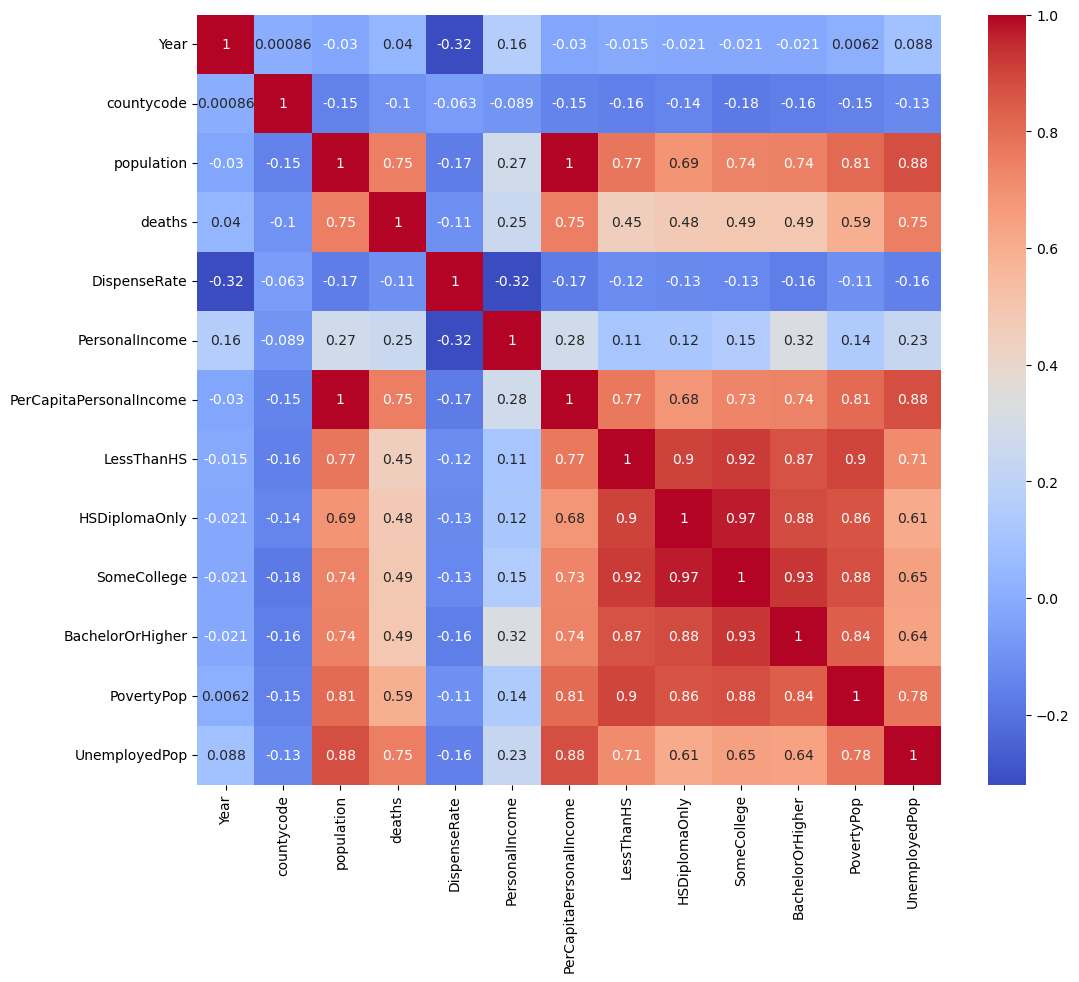

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a correlation matrix to identify the relationships between the variables

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [7]:
# Import necessary libraries

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [8]:
# Apply one-hot encoding to 'State' and 'county' columns

df_encoded = pd.get_dummies(df, columns=['State', 'county'])

In [9]:
# Create X and y

X = df_encoded.drop(['deaths'], axis=1)
y_encoded = df_encoded['deaths']

In [10]:
# Split the encoded data into training and testing sets

X_train_enc, X_test_enc, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [11]:
# Scale the features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_enc)
X_test_scaled = scaler.transform(X_test_enc)

In [12]:
# Initialize the MLPRegressor with max_iter=500

mlp = MLPRegressor(hidden_layer_sizes=(64, 64), activation='relu', solver='adam', random_state=42, max_iter=500)

# Train the MLPRegressor on the training data
mlp.fit(X_train_scaled, y_train)

# Predict the opioid overdose death rates using the MLPRegressor
y_pred_mlp = mlp.predict(X_test_scaled)

In [13]:
# Calculate R-squared score, Mean Squared Error, and Root Mean Squared Error for the MLPRegressor
mlp_r2 = r2_score(y_test, y_pred_mlp)
mlp_mse = mean_squared_error(y_test, y_pred_mlp)
mlp_rmse = np.sqrt(mlp_mse)

print(f"MLPRegressor R-squared score: {mlp_r2:.3f}")
print(f"MLPRegressor Mean Squared Error: {mlp_mse:.3f}")
print(f"MLPRegressor Root Mean Squared Error: {mlp_rmse:.3f}")

MLPRegressor R-squared score: 0.682
MLPRegressor Mean Squared Error: 4169.988
MLPRegressor Root Mean Squared Error: 64.575
